In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

In [2]:
# Load dataset
df = pd.read_csv("../notebook/data/startup data.csv")
print("Dataset loaded")

Dataset loaded


In [3]:
# Convert date columns
date_cols = ['founded_at', 'closed_at', 'first_funding_at', 'last_funding_at']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [4]:

# Fill missing values
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include='object').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna('Unknown')

In [5]:
# Remove outliers in funding
Q1 = df['funding_total_usd'].quantile(0.25)
Q3 = df['funding_total_usd'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['funding_total_usd'] >= Q1 - 1.5*IQR) & (df['funding_total_usd'] <= Q3 + 1.5*IQR)]

In [6]:
# Feature Engineering
df['startup_age'] = datetime.now().year - df['founded_at'].dt.year.fillna(datetime.now().year)
df['funding_velocity'] = df['funding_total_usd'] / (df['startup_age'] + 1)
scaler = MinMaxScaler()
df['funding_velocity'] = scaler.fit_transform(df[['funding_velocity']])

In [7]:
# Add Outcome column
df['Outcome'] = df['status'].apply(lambda x: 'Bankruptcy' if x == 'closed' else 'Success')

C:\Users\HP\AppData\Local\Temp\ipykernel_11296\2106806428.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set2')


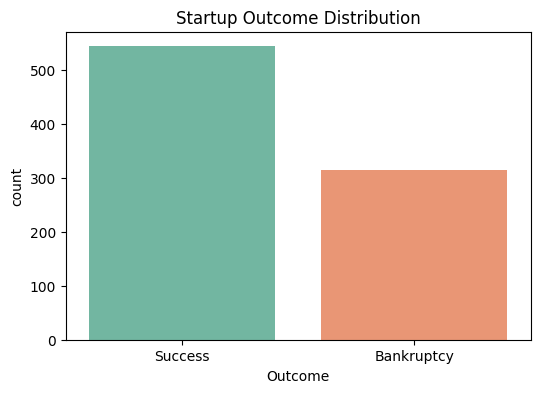

In [8]:
# EDA plots
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df, palette='Set2')
plt.title('Startup Outcome Distribution')
plt.show()

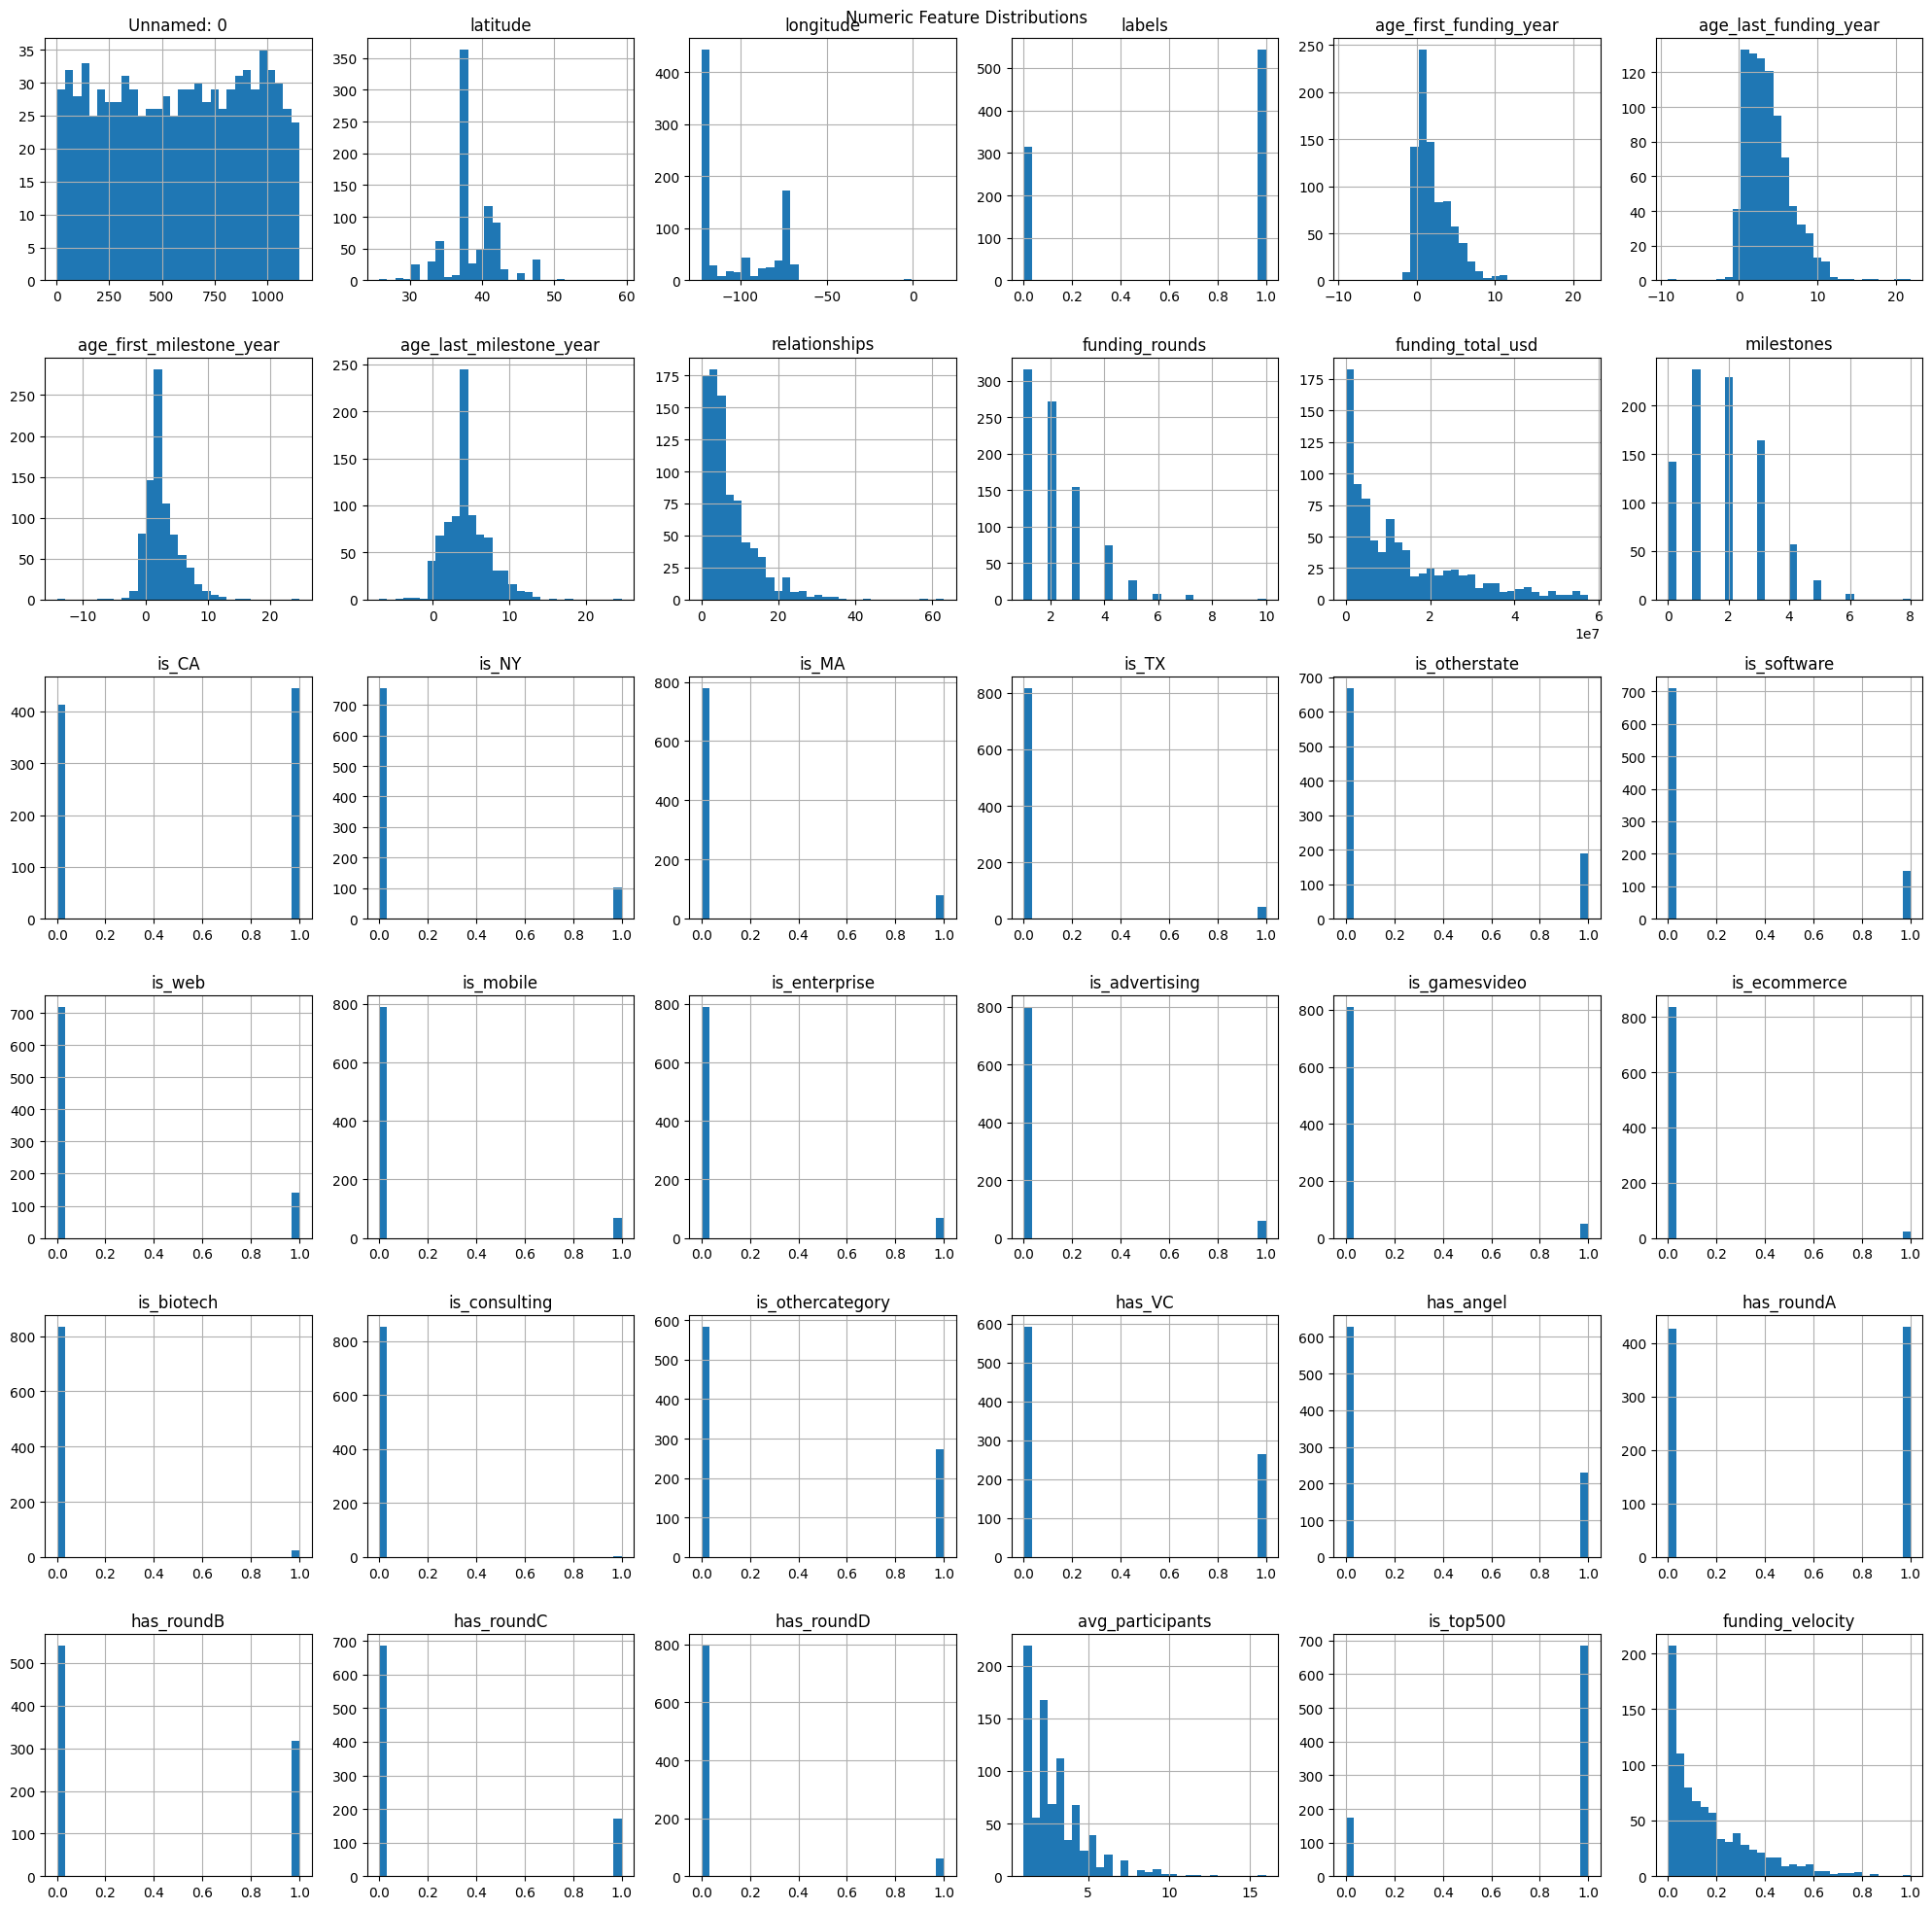

In [9]:
# Numeric feature histograms
df.select_dtypes(include=['float64', 'int64']).hist(figsize=(20, 20), bins=30)
plt.suptitle("Numeric Feature Distributions")
plt.tight_layout()
plt.show()

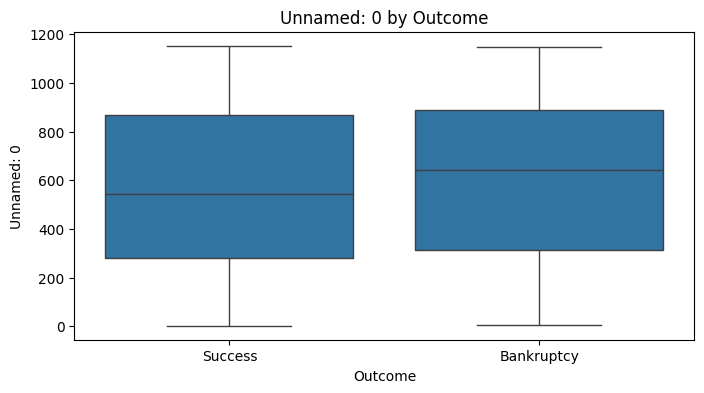

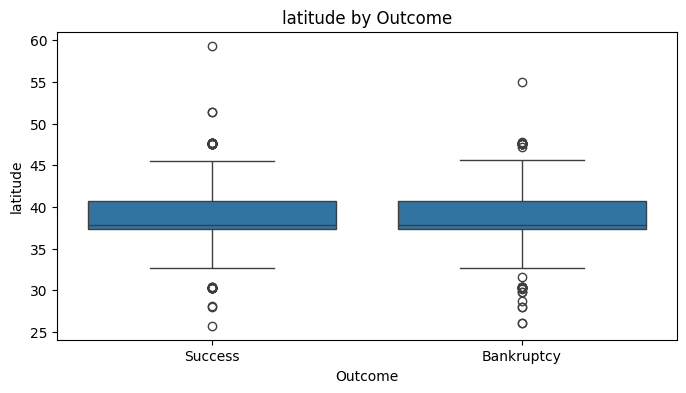

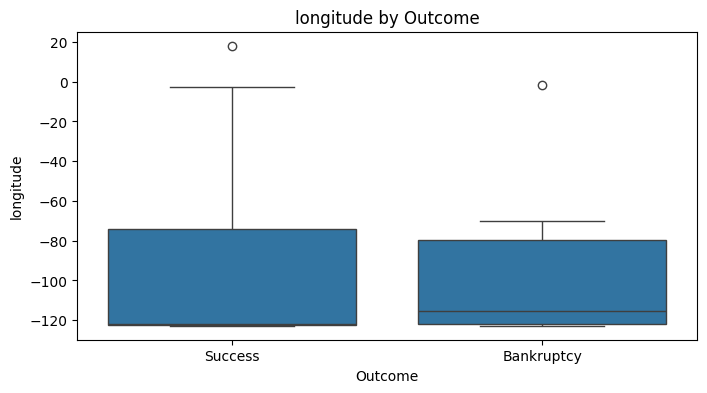

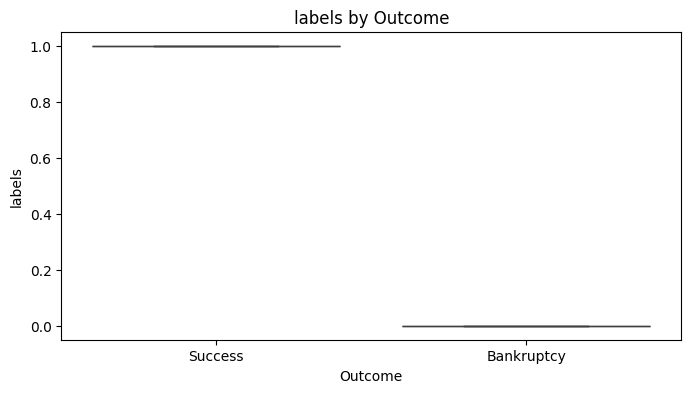

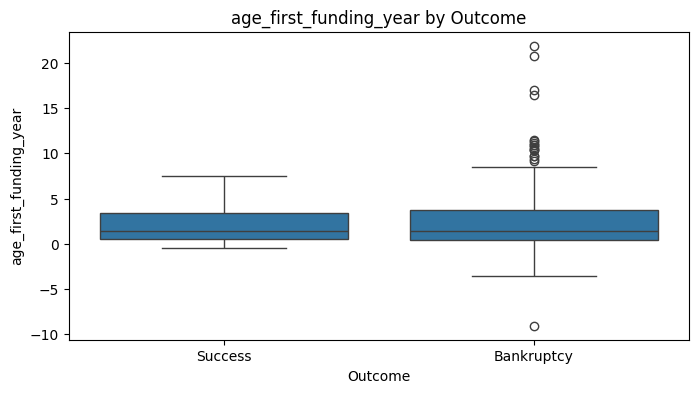

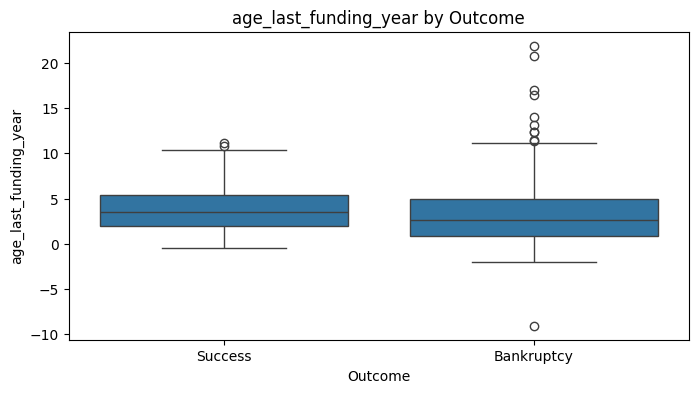

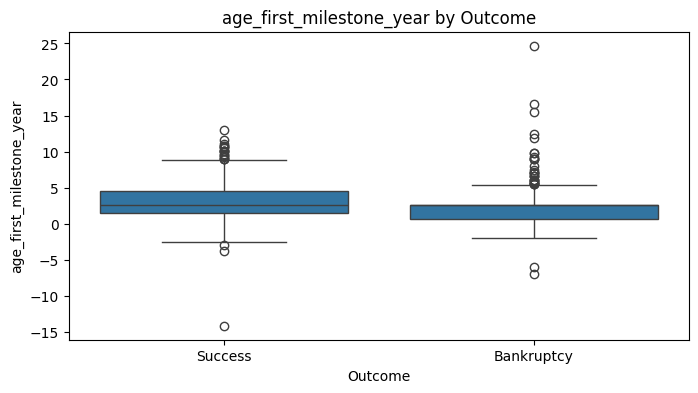

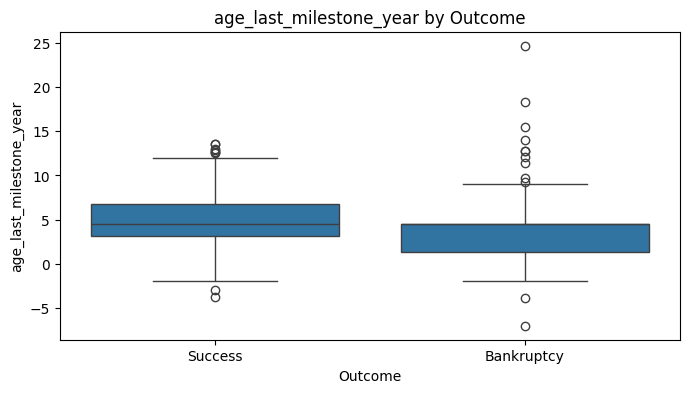

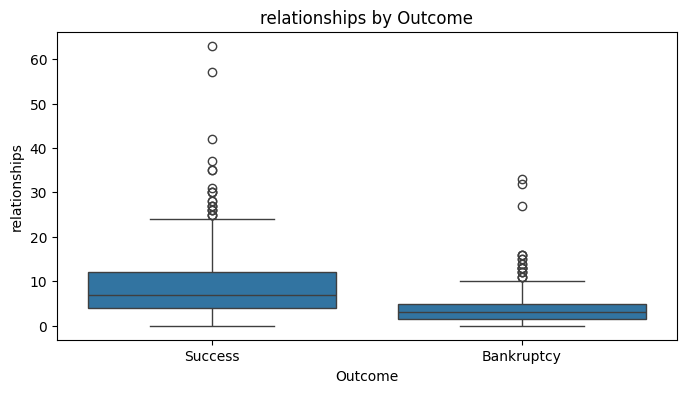

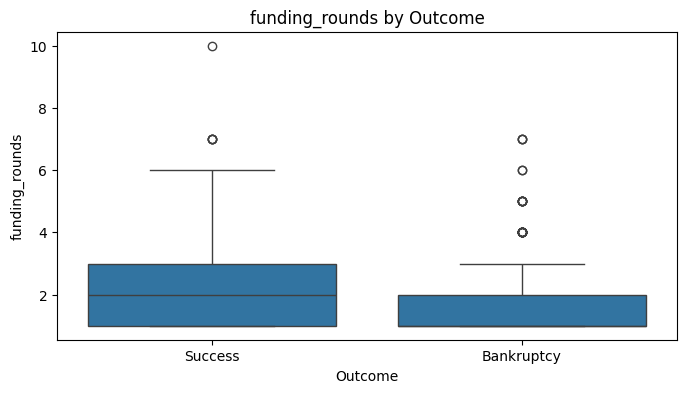

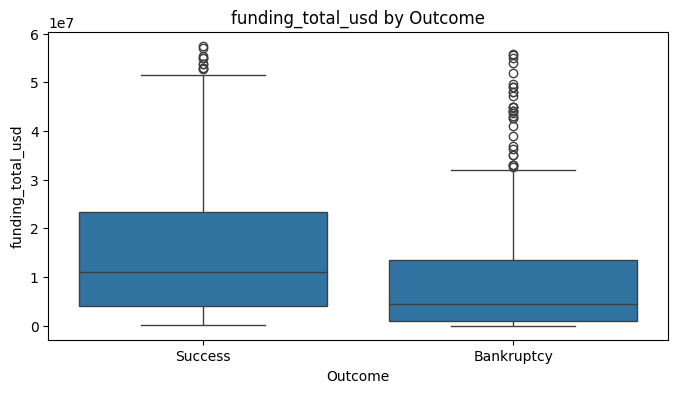

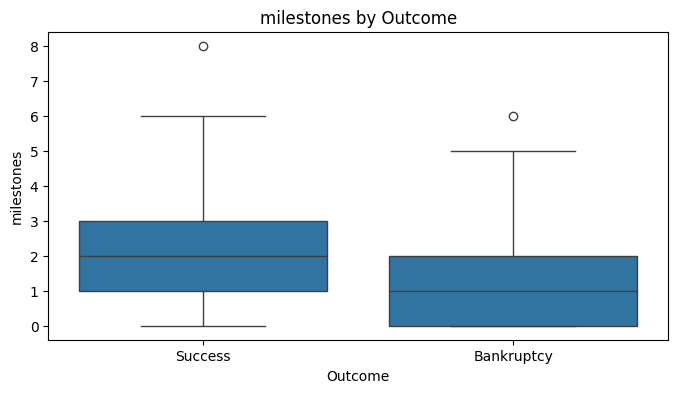

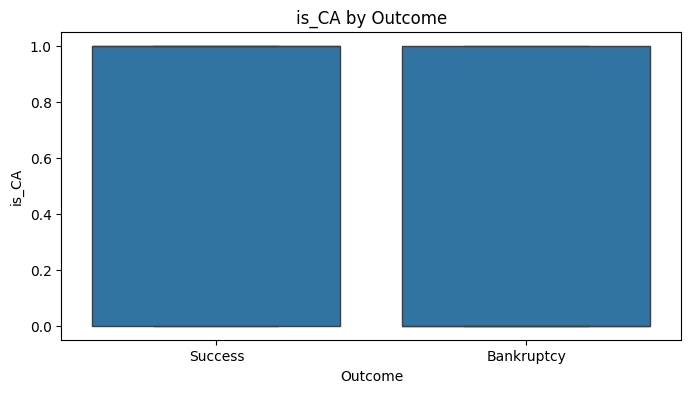

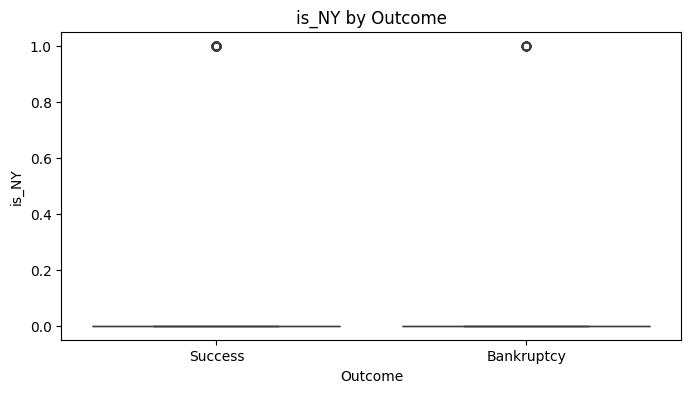

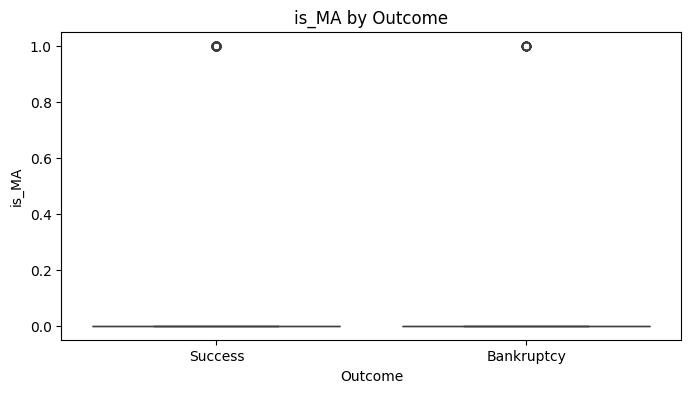

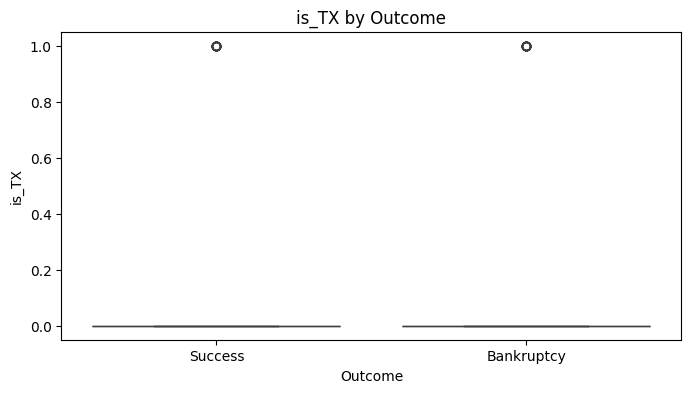

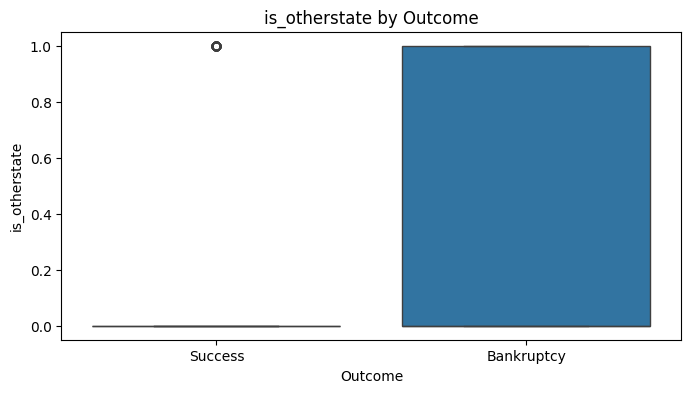

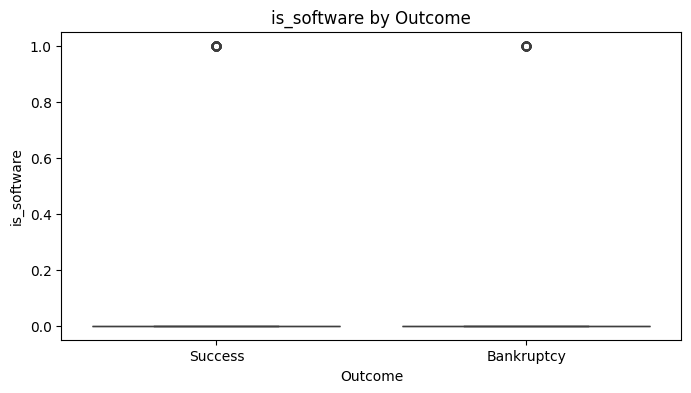

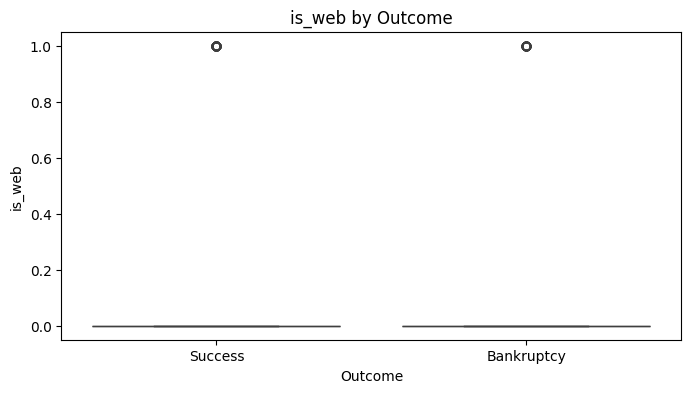

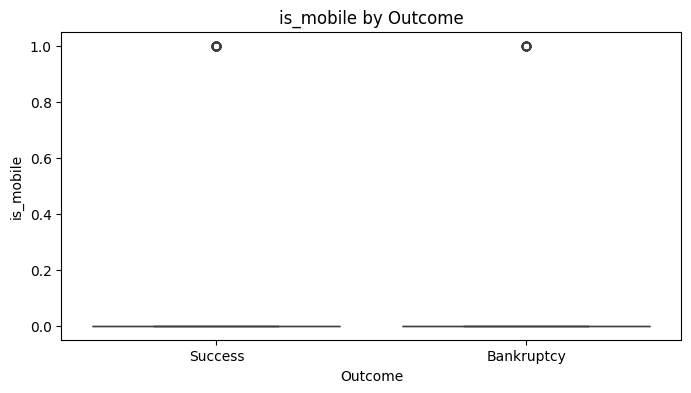

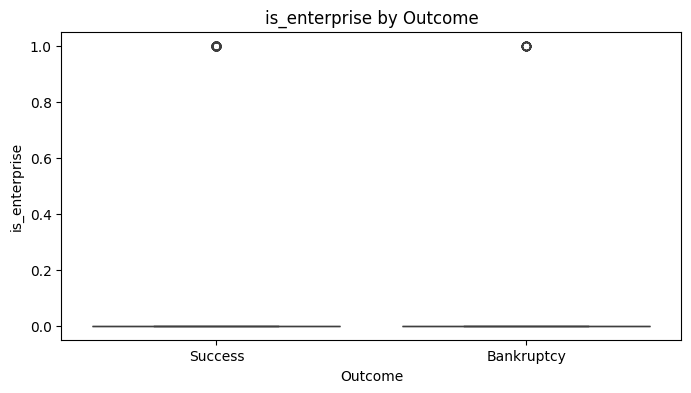

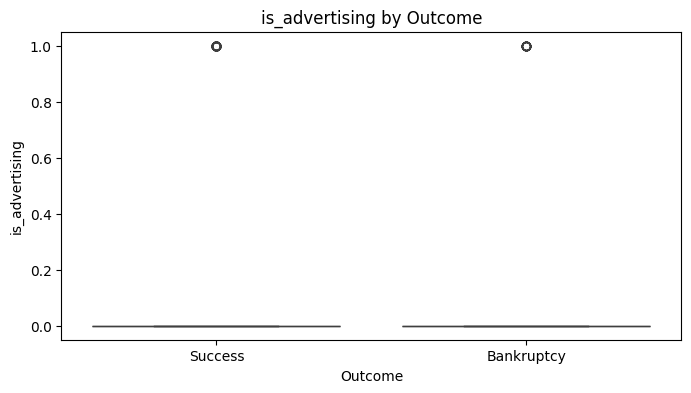

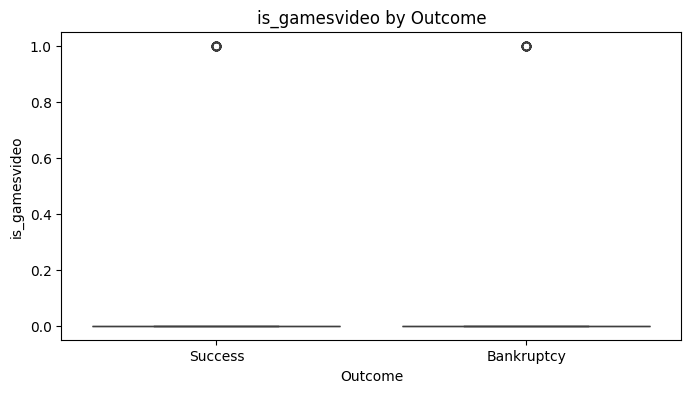

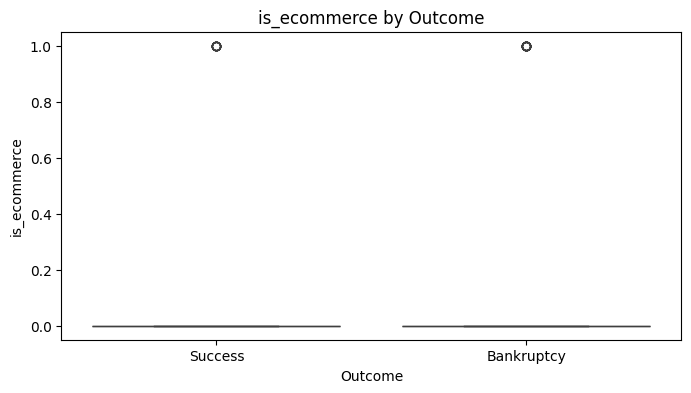

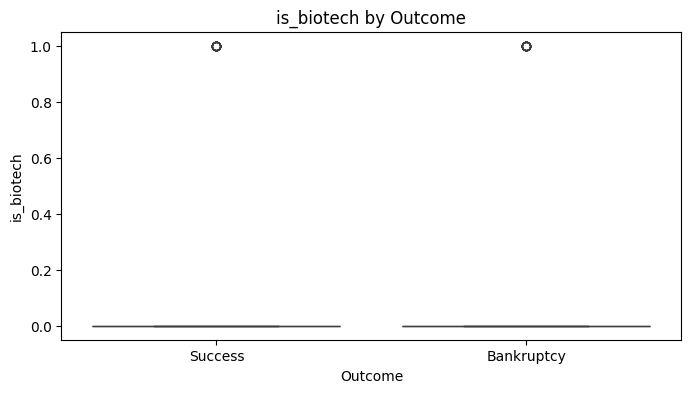

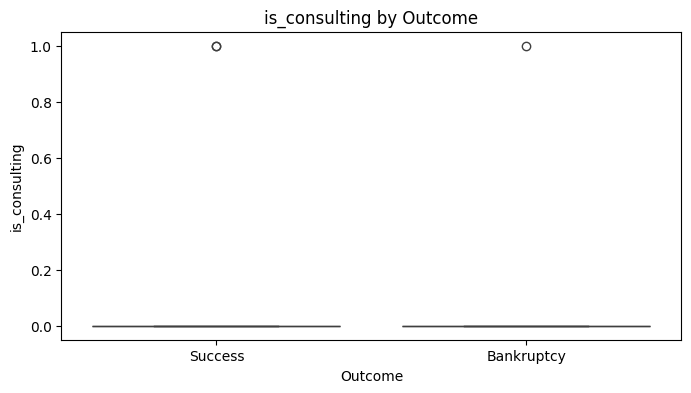

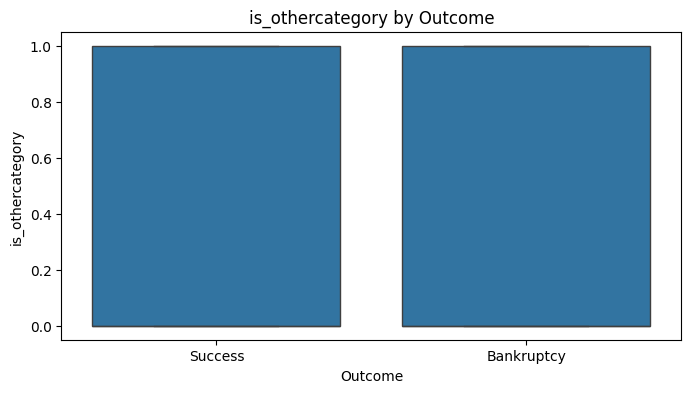

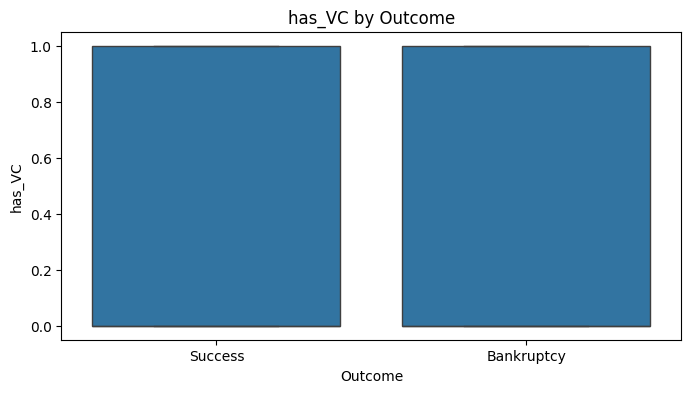

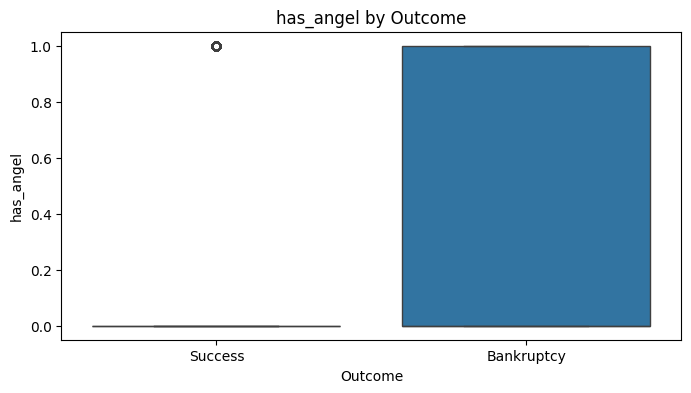

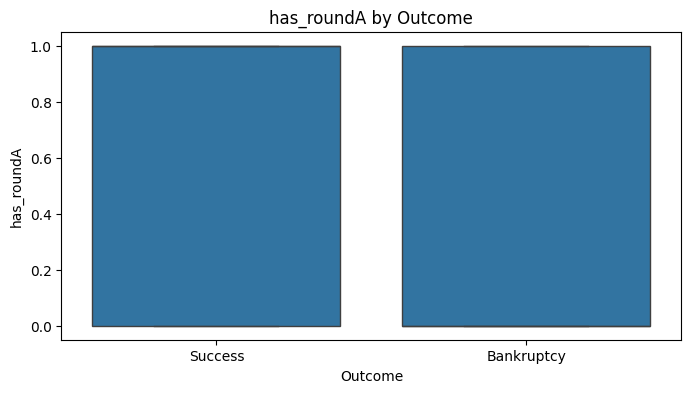

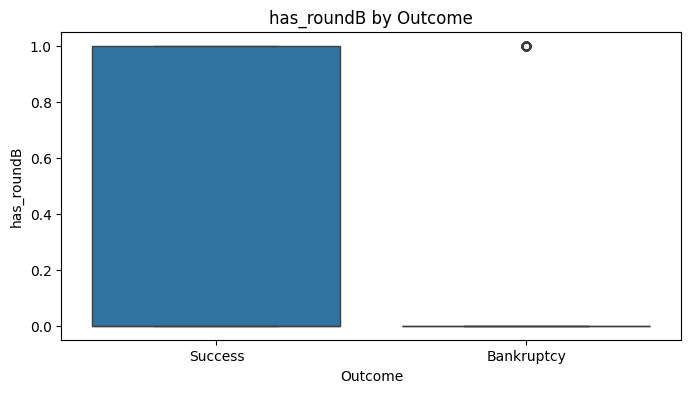

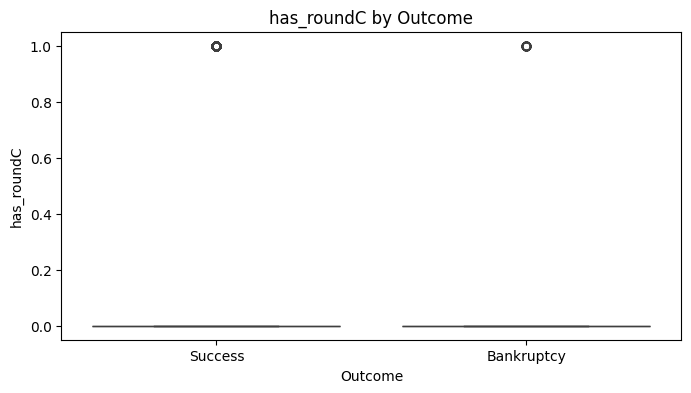

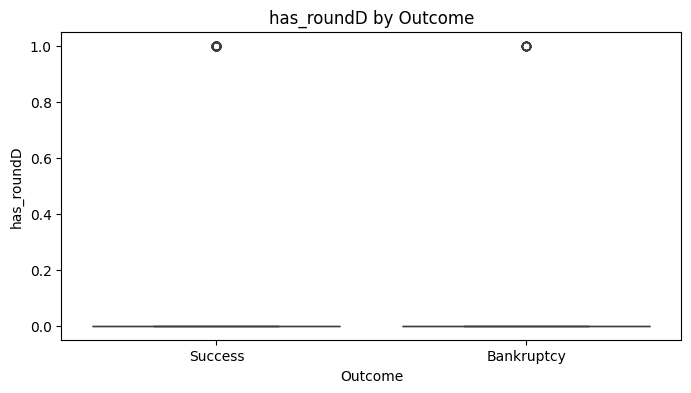

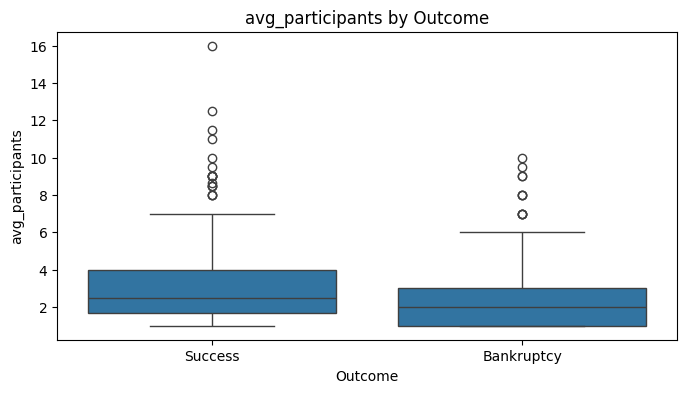

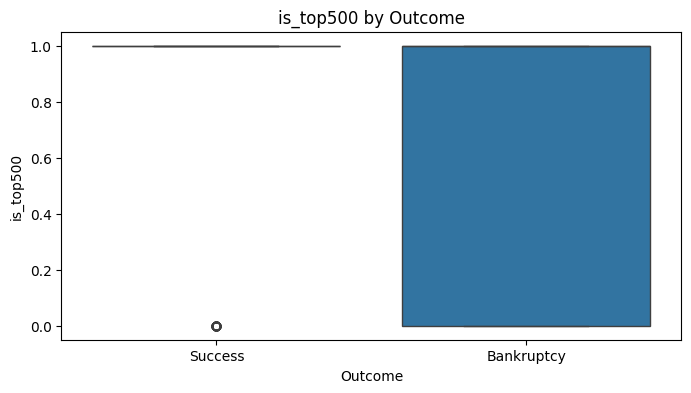

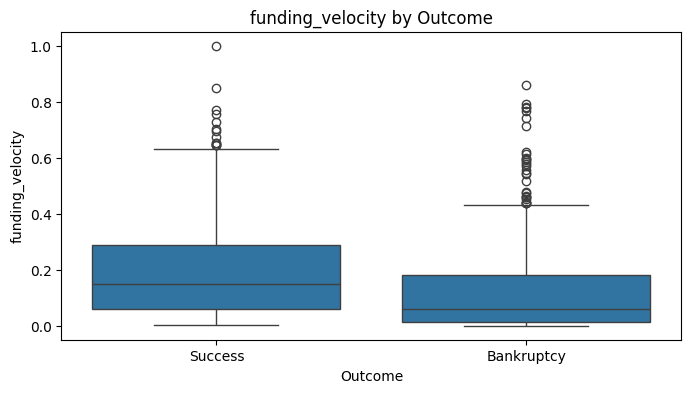

In [10]:
# Boxplots
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f"{col} by Outcome")
    plt.show()

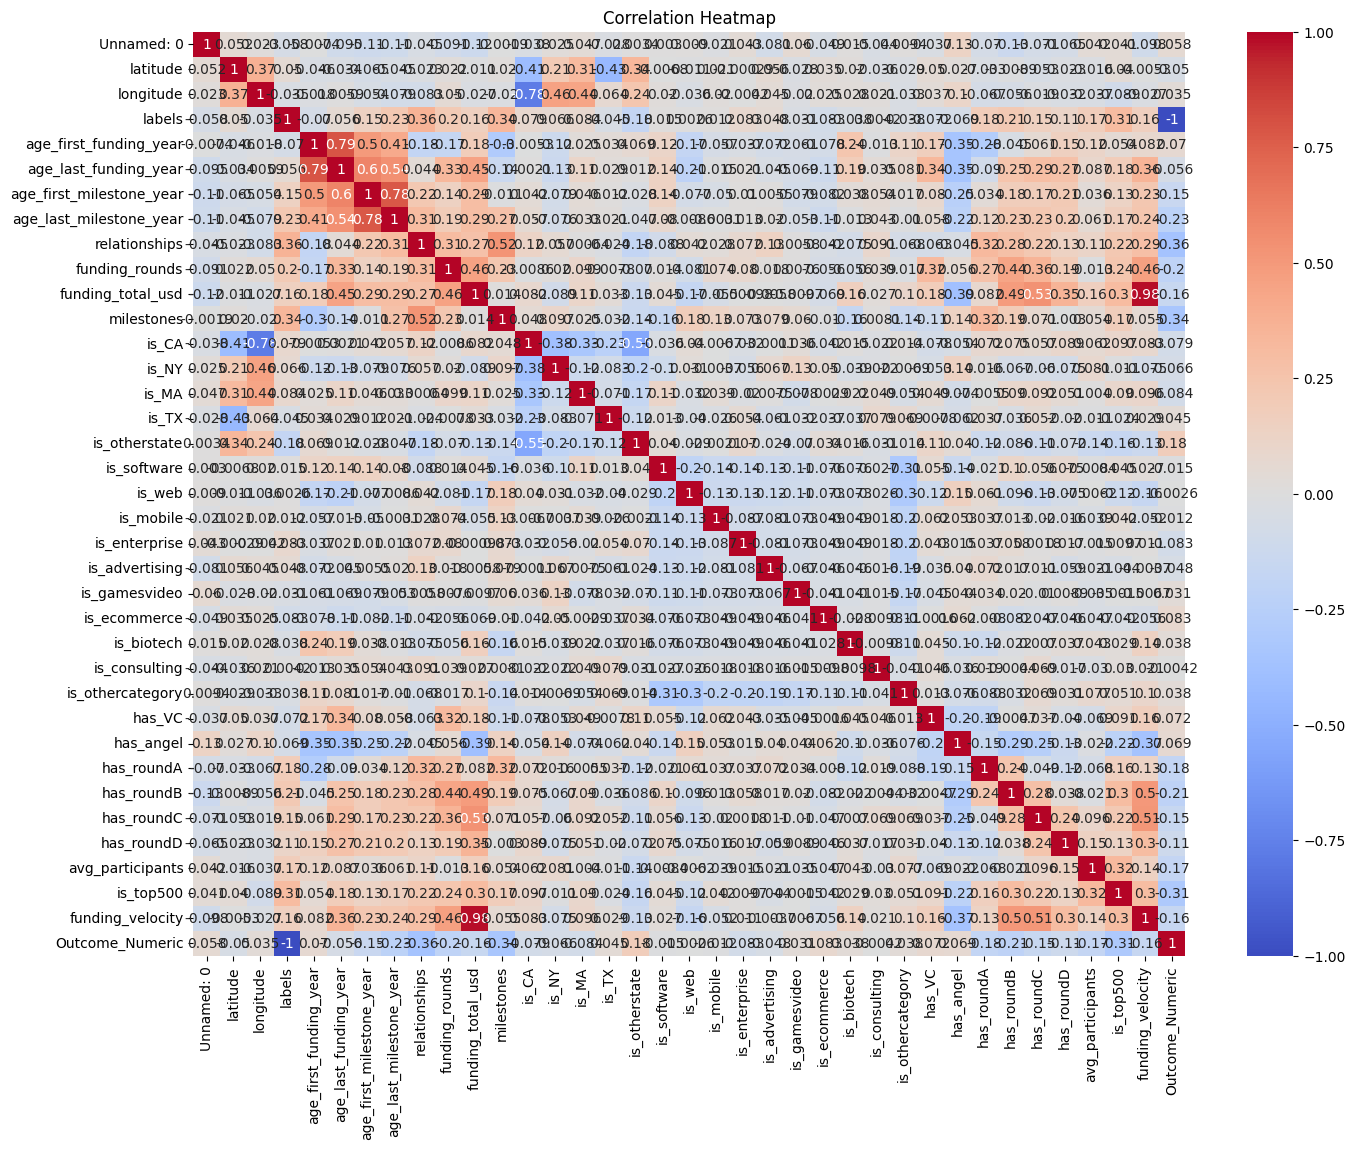

In [11]:
# Correlation heatmap
df['Outcome_Numeric'] = df['Outcome'].apply(lambda x: 1 if x == 'Bankruptcy' else 0)
corr = df[numeric_cols.tolist() + ['Outcome_Numeric']].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [12]:
# Trends Over Time
df['founded_year'] = df['founded_at'].dt.year
df['closed_year'] = df['closed_at'].dt.year
df['funding_year'] = df['first_funding_at'].dt.year

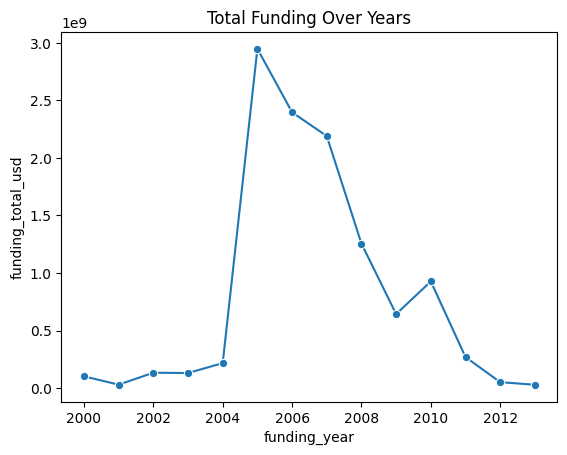

In [13]:

funding_by_year = df.groupby('funding_year')['funding_total_usd'].sum().reset_index()
sns.lineplot(data=funding_by_year, x='funding_year', y='funding_total_usd', marker='o')
plt.title("Total Funding Over Years")
plt.show()

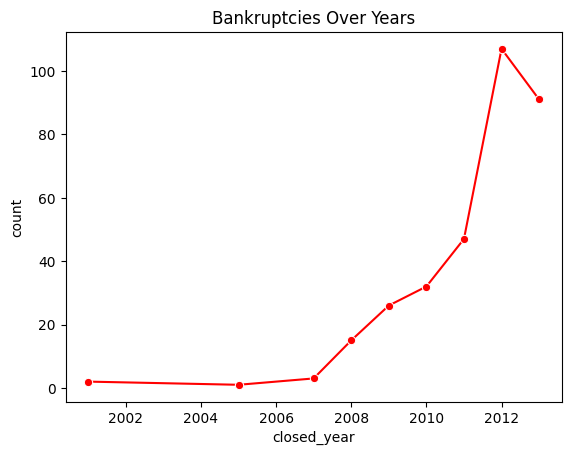

In [14]:
bankruptcies = df.groupby('closed_year').size().reset_index(name='count')
sns.lineplot(data=bankruptcies, x='closed_year', y='count', marker='o', color='red')
plt.title("Bankruptcies Over Years")
plt.show()